In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

1.load the dataset at HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.

In [2]:
df = pd.read_csv("HR_comma_sep.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


2.Establish a benchmark: what would be your accuracy score if you predicted everyone stay?


left is the binary column.
left = 1, people left the company

In [6]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [7]:
df.left.value_counts()/len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

76% stay & 23% left company

predicting 0 yields accuracy = 76%
benchmark: for predicting leaving we have to be better than 76%

3.Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.

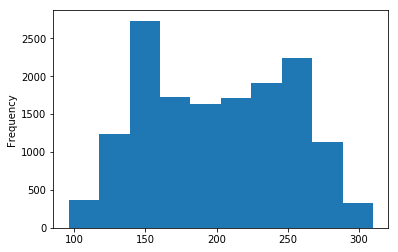

In [9]:
#avg monthly hours big, so rescale
df['average_montly_hours'].plot(kind = 'hist')

In [10]:
df['average_montly_hours_100'] = df['average_montly_hours']/100

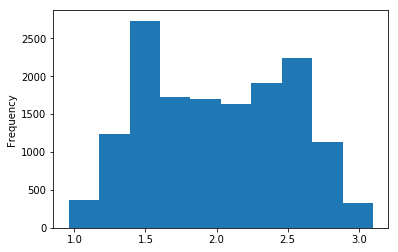

In [13]:
df['average_montly_hours_100'].plot(kind = 'hist')

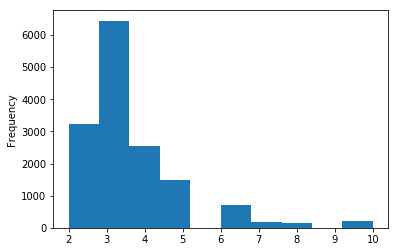

In [12]:
df['time_spend_company'].plot(kind='hist')

4.convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using pd.concat.

In [14]:
df_dummies = pd.get_dummies(df[['sales','salary']])

In [15]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [17]:
#col that we originally had
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary', 'average_montly_hours_100'],
      dtype='object')

In [18]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 'number_project',
                   'time_spend_company', 'Work_accident',
                   'promotion_last_5years', 'average_montly_hours_100']],
               df_dummies], axis=1).values
y = df['left'].values

In [19]:
X.shape

(14999, 20)

6.do the usual train/test split with a 20% test size

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

6.play around with learning rate and optimizer

In [25]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [28]:
# for logistic reg : input dimension = 20, activation func is sigmoid, loss func is binarycrossentropy
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [30]:
model.summary()
#parameter is 20+ 1 bias

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
11999/11999 [==============================] - 2s 151us/step - loss: 0.5454 - acc: 0.7633
Epoch 2/10
11999/11999 [==============================] - 2s 152us/step - loss: 0.5459 - acc: 0.7598
Epoch 3/10
11999/11999 [==============================] - 2s 162us/step - loss: 0.5574 - acc: 0.7592
Epoch 4/10
11999/11999 [==============================] - 2s 142us/step - loss: 0.5437 - acc: 0.7646
Epoch 5/10
11999/11999 [==============================] - 1s 117us/step - loss: 0.5557 - acc: 0.7576
Epoch 6/10
11999/11999 [==============================] - 1s 96us/step - loss: 0.5341 - acc: 0.7655
Epoch 7/10
11999/11999 [==============================] - 1s 91us/step - loss: 0.5273 - acc: 0.7681
Epoch 8/10
11999/11999 [==============================] - 1s 89us/step - loss: 0.5291 - acc: 0.7647
Epoch 9/10
11999/11999 [==============================] - 1s 88us/step - loss: 0.5456 - acc: 0.7625
Epoch 10/10
11999/11999 [==============================] - 1s 84us/step - loss: 0.5300 - acc: 0

In [33]:
y_test_pred = model.predict_classes(X_test)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

In [35]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

7.check the confusion matrix, precision and recall

In [36]:
pretty_confusion_matrix(y_test, y_test_pred, labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2183,121
Leave,522,174


In [38]:
print(classification_report(y_test, y_test_pred))
#scores for class 1 is low, model is terrible

             precision    recall  f1-score   support

          0       0.81      0.95      0.87      2304
          1       0.59      0.25      0.35       696

avg / total       0.76      0.79      0.75      3000



8.check if you still get the same results if you use a 5-Fold cross validation on all the data

In [39]:
from keras.wrappers.scikit_learn import KerasClassifier

In [40]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=10, verbose=0)

In [41]:
from sklearn.model_selection import KFold, cross_val_score

In [42]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7532 ± 0.0350


In [43]:
scores

array([ 0.75866667,  0.8       ,  0.77866667,  0.70333333,  0.72557519])

9.Is the model good enough for your boss?

No, the model is not good enough for my boss, since it performs no better than the benchmark.